# Final Group Project
### 15-minute walkable city comparison: San Diego and Washington D.C.
Group members: Cara Higashi, Robert Lopez, Joseph Sy, Giovanni Ramos Gutierrez


## Import Datasets

In [105]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from dup_col import duplicate_columns

In [66]:
# import census data for city boundaries
census_path = "~/15min/cities/cb_2023_us_place_500k.shp"

In [3]:
census_gdf = gpd.read_file(census_path, geometry='geometry')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [4]:
census_gdf.head()

STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID           NAME  \
0      06   60620  02410939  1600000US0660620  0660620       Richmond   
1      12   06100  02405260  1600000US1206100  1206100  Beverly Beach   
2      04   77000  02412104  1600000US0477000  0477000         Tucson   
3      17   39298  02395499  1600000US1739298  1739298     Keithsburg   
4      04   62350  02411761  1600000US0462350  0462350      St. Johns   

             NAMELSAD STUSPS  STATE_NAME LSAD      ALAND    AWATER  \
0       Richmond city     CA  California   25   77809546  58194574   
1  Beverly Beach town     FL     Florida   43     797487     12352   
2         Tucson city     AZ     Arizona   25  627262641    819368   
3     Keithsburg city     IL    Illinois   25    6626047   1607539   
4      St. Johns city     AZ     Arizona   25   67101250    457467   

                                            geometry  
0  MULTIPOLYGON (((-122.36683 37.96200, -122.3647...  
1  POLYGON ((-81.15232 29.52475, -81.14843 29.524...  
2  POLYGON ((-111.05873 32.20679, -111.05446 32.2...  
3  POLYGON ((-90.96091 41.11467, -90.94259 41.114...  
4  POLYGON ((-109.42715 34.48217, -109.41908 34.4...

<Axes: >

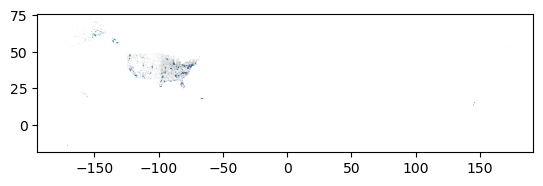

In [5]:
census_gdf.plot()

In [6]:
census_gdf.shape

(32608, 13)

In [60]:
# filter for only city of San Diego 
sd_gdf = census_gdf[census_gdf['NAME'] == 'San Diego']

In [61]:
sd_gdf

STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID       NAME  \
3735       06   66000  02411782  1600000US0666000  0666000  San Diego   
15200      48   65180  02411783  1600000US4865180  4865180  San Diego   

             NAMELSAD STUSPS  STATE_NAME LSAD      ALAND     AWATER  \
3735   San Diego city     CA  California   25  844561510  120010437   
15200  San Diego city     TX       Texas   25    4923549          0   

                                                geometry  
3735   MULTIPOLYGON (((-116.93192 32.64961, -116.9314...  
15200  POLYGON ((-98.24853 27.77454, -98.24552 27.773...

In [63]:
sd = sd_gdf[sd_gdf['STATE_NAME'] == 'California']
sd

STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID       NAME  \
3735      06   66000  02411782  1600000US0666000  0666000  San Diego   

            NAMELSAD STUSPS  STATE_NAME LSAD      ALAND     AWATER  \
3735  San Diego city     CA  California   25  844561510  120010437   

                                               geometry  
3735  MULTIPOLYGON (((-116.93192 32.64961, -116.9314...

<Axes: >

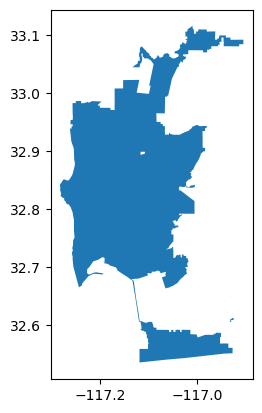

In [64]:
sd.plot()

In [67]:
# filter for only DC 
dc_gdf = census_gdf[census_gdf['STATE_NAME'] == 'District of Columbia']

In [12]:
dc_gdf

STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID        NAME  \
205      11   50000  02390665  1600000US1150000  1150000  Washington   

            NAMELSAD STUSPS            STATE_NAME LSAD      ALAND    AWATER  \
205  Washington city     DC  District of Columbia   25  158316184  18709787   

                                              geometry  
205  POLYGON ((-77.11976 38.93434, -77.11253 38.940...

<Axes: >

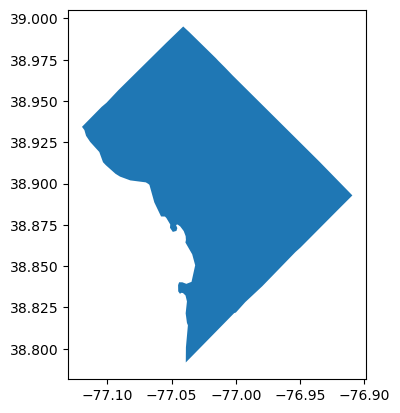

In [13]:
dc_gdf.plot()

## SD and DC Tracts

In [95]:
tracts = gpd.read_file("~/15min/tracts/cb_2022_us_tract_5m.shp", geometry='geometry')

In [96]:
tracts.columns.values

array(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry'], dtype=object)

In [98]:
sd_tracts = tracts[(tracts['STATE_NAME'] == 'California') & (tracts['COUNTYFP'] == '073')]

In [97]:
dc_tracts = tracts[tracts['STATE_NAME'] == 'District of Columbia']

<Axes: >

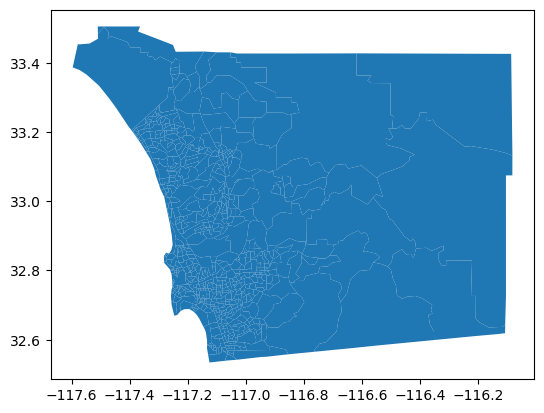

In [99]:
sd_tracts.plot()

In [106]:
duplicate_columns(sd_tracts, sd_gdf)

Duplicate column names found:
- GEOIDFQ
- PLACEFP
- geometry
- PLACENS


In [107]:

sd_city = gpd.overlay(sd_tracts, sd, how='identity', keep_geom_type=None, make_valid=True) 

/tmp/ipykernel_4112559/1769365465.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:2230

  sd_city = gpd.overlay(sd_tracts, sd, how='identity', keep_geom_type=None, make_valid=True)


IndexError: single positional indexer is out-of-bounds

## San Diego Schools

In [71]:
# import national school dataset, then filter for sd and dc
schools_path = "~/15min/schools/EDGE_GEOCODE_PUBLICSCH_2223.shp"

In [15]:
schools = gpd.read_file(schools_path, geometry='geometry')

In [16]:
type(schools)

geopandas.geodataframe.GeoDataFrame

In [17]:
schools.head()

NCESSCH    LEAID                               NAME OPSTFIPS  \
0  010000500870  0100005          Albertville Middle School       01   
1  010000500871  0100005            Albertville High School       01   
2  010000500879  0100005    Albertville Intermediate School       01   
3  010000500889  0100005      Albertville Elementary School       01   
4  010000501616  0100005  Albertville Kindergarten and PreK       01   

                STREET         CITY STATE    ZIP STFIP   CNTY  ... CBSATYPE  \
0    600 E Alabama Ave  Albertville    AL  35950    01  01095  ...        2   
1     402 E McCord Ave  Albertville    AL  35950    01  01095  ...        2   
2   901 W McKinney Ave  Albertville    AL  35950    01  01095  ...        2   
3   145 West End Drive  Albertville    AL  35950    01  01095  ...        2   
4  257 Country Club Rd  Albertville    AL  35951    01  01095  ...        2   

  CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0   N      N      N       N  0104  01026  01009  2022-2023   
1   N      N      N       N  0104  01026  01009  2022-2023   
2   N      N      N       N  0104  01026  01009  2022-2023   
3   N      N      N       N  0104  01026  01009  2022-2023   
4   N      N      N       N  0104  01026  01009  2022-2023   

                     geometry  
0  POINT (-86.20620 34.26020)  
1  POINT (-86.20490 34.26220)  
2  POINT (-86.22010 34.27330)  
3  POINT (-86.22181 34.25270)  
4  POINT (-86.19330 34.28980)  

[5 rows x 26 columns]

In [18]:
ca_schools = schools[schools['STATE'] == 'CA']

In [19]:
sd_schools = ca_schools[ca_schools['CITY'] == 'San Diego']

In [20]:
sd_schools

NCESSCH    LEAID                                     NAME  \
6199   060013811406  0600138                     San Diego County ROP   
6412   060146814198  0601468                 America's Finest Charter   
6425   060148312630  0601483          San Diego Global Vision Academy   
6444   060150313795  0601503                                  Elevate   
6453   060151511386  0601515                High Tech High Media Arts   
...             ...      ...                                      ...   
15955  069103012496  0691030                                  Monarch   
15957  069103013682  0691030               San Diego County Community   
15958  069103013693  0691030                   San Diego County Court   
15959  069103014068  0691030    HOPE Infant-Toddler Special Education   
16032  069105212994  0691052  Urban Corps of San Diego County Charter   

      OPSTFIPS                        STREET       CITY STATE    ZIP STFIP  \
6199        06          6401 Linda Vista Rd.  San Diego    CA  92111    06   
6412        06                  730 45th St.  San Diego    CA  92102    06   
6425        06                  3430 Sch St.  San Diego    CA  92116    06   
6444        06         2285 Murray Ridge Rd.  San Diego    CA  92123    06   
6453        06              2230 Truxtun Rd.  San Diego    CA  92106    06   
...        ...                           ...        ...   ...    ...   ...   
15955       06              1625 Newton Ave.  San Diego    CA  92113    06   
15957       06  6401 Linda Vista Rd. Rm. 216  San Diego    CA  92111    06   
15958       06          2801 Meadow Lark Dr.  San Diego    CA  92123    06   
15959       06          6401 Linda Vista Rd.  San Diego    CA  92111    06   
16032       06            3127 Jefferson St.  San Diego    CA  92110    06   

        CNTY  ... CBSATYPE CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU  \
6199   06073  ...        1   N      N      N       N  0653  06079  06039   
6412   06073  ...        1   N      N      N       N  0651  06080  06040   
6425   06073  ...        1   N      N      N       N  0653  06078  06039   
6444   06073  ...        1   N      N      N       N  0653  06079  06039   
6453   06073  ...        1   N      N      N       N  0652  06078  06039   
...      ...  ...      ...  ..    ...    ...     ...   ...    ...    ...   
15955  06073  ...        1   N      N      N       N  0651  06080  06040   
15957  06073  ...        1   N      N      N       N  0653  06079  06039   
15958  06073  ...        1   N      N      N       N  0653  06079  06039   
15959  06073  ...        1   N      N      N       N  0653  06079  06039   
16032  06073  ...        1   N      N      N       N  0652  06078  06039   

      SCHOOLYEAR                     geometry  
6199   2022-2023  POINT (-117.17986 32.76963)  
6412   2022-2023  POINT (-117.09805 32.71284)  
6425   2022-2023  POINT (-117.11906 32.76264)  
6444   2022-2023  POINT (-117.14416 32.78656)  
6453   2022-2023  POINT (-117.21984 32.73461)  
...          ...                          ...  
15955  2022-2023  POINT (-117.15040 32.70240)  
15957  2022-2023  POINT (-117.17986 32.76963)  
15958  2022-2023  POINT (-117.15372 32.79439)  
15959  2022-2023  POINT (-117.17986 32.76963)  
16032  2022-2023  POINT (-117.20344 32.75536)  

[288 rows x 26 columns]

<Axes: >

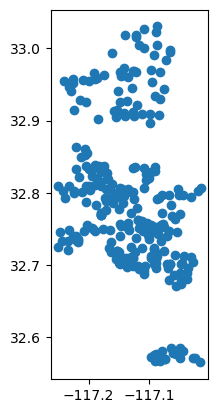

In [21]:
sd_schools.plot()

## Wahsington DC Schools

In [22]:
schools

NCESSCH    LEAID                               NAME OPSTFIPS  \
0       010000500870  0100005          Albertville Middle School       01   
1       010000500871  0100005            Albertville High School       01   
2       010000500879  0100005    Albertville Intermediate School       01   
3       010000500889  0100005      Albertville Elementary School       01   
4       010000501616  0100005  Albertville Kindergarten and PreK       01   
...              ...      ...                                ...      ...   
102263  780003000024  7800030         LOCKHART ELEMENTARY SCHOOL       78   
102264  780003000026  7800030    ULLA F MULLER ELEMENTARY SCHOOL       78   
102265  780003000027  7800030    YVONNE BOWSKY ELEMENTARY SCHOOL       78   
102266  780003000033  7800030         CANCRYN JUNIOR HIGH SCHOOL       78   
102267  780003000034  7800030       BERTHA BOSCHULTE JUNIOR HIGH       78   

                           STREET          CITY STATE    ZIP STFIP   CNTY  \
0               600 E Alabama Ave   Albertville    AL  35950    01  01095   
1                402 E McCord Ave   Albertville    AL  35950    01  01095   
2              901 W McKinney Ave   Albertville    AL  35950    01  01095   
3              145 West End Drive   Albertville    AL  35950    01  01095   
4             257 Country Club Rd   Albertville    AL  35951    01  01095   
...                           ...           ...   ...    ...   ...    ...   
102263           41 ESTATE THOMAS  Saint Thomas    VI  00802    78  78030   
102264          7B ESTATE CONTANT  Saint Thomas    VI  00802    78  78030   
102265  15B and 16 ESTATE MANDAHL  Saint Thomas    VI  00802    78  78030   
102266                1 CROWN BAY  Saint Thomas    VI  00804    78  78030   
102267         9 1 and 12A BOVONI  Saint Thomas    VI  00802    78  78030   

        ... CBSATYPE CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0       ...        2   N      N      N       N  0104  01026  01009  2022-2023   
1       ...        2   N      N      N       N  0104  01026  01009  2022-2023   
2       ...        2   N      N      N       N  0104  01026  01009  2022-2023   
3       ...        2   N      N      N       N  0104  01026  01009  2022-2023   
4       ...        2   N      N      N       N  0104  01026  01009  2022-2023   
...     ...      ...  ..    ...    ...     ...   ...    ...    ...        ...   
102263  ...        0   N      N      N       N  7898      N      N  2022-2023   
102264  ...        0   N      N      N       N  7898      N      N  2022-2023   
102265  ...        0   N      N      N       N  7898      N      N  2022-2023   
102266  ...        0   N      N      N       N  7898      N      N  2022-2023   
102267  ...        0   N      N      N       N  7898      N      N  2022-2023   

                          geometry  
0       POINT (-86.20620 34.26020)  
1       POINT (-86.20490 34.26220)  
2       POINT (-86.22010 34.27330)  
3       POINT (-86.22181 34.25270)  
4       POINT (-86.19330 34.28980)  
...                            ...  
102263  POINT (-64.91760 18.34195)  
102264  POINT (-64.95248 18.33874)  
102265  POINT (-64.89902 18.35478)  
102266  POINT (-64.94594 18.33666)  
102267  POINT (-64.89031 18.31823)  

[102268 rows x 26 columns]

In [23]:
dc_schools = gpd.GeoDataFrame(schools[schools['STATE'] == 'DC'], geometry=schools['geometry'])
dc_schools

NCESSCH    LEAID  \
19330  110000500456  1100005   
19331  110000800338  1100008   
19332  110000800382  1100008   
19333  110000800478  1100008   
19334  110000800479  1100008   
...             ...      ...   
19569  110011400538  1100114   
19570  110011500539  1100115   
19571  110011600545  1100116   
19572  110011700546  1100117   
19573  110011800778  1100118   

                                                    NAME OPSTFIPS  \
19330  Cesar Chavez Public Charter Schools for Public...       11   
19331                Friendship PCS - Collegiate Academy       11   
19332              Friendship PCS - Southeast Elementary       11   
19333                Friendship PCS - Blow Pierce Middle       11   
19334            Friendship PCS - Blow Pierce Elementary       11   
...                                                  ...      ...   
19569                                        I Dream PCS       11   
19570                                 Social Justice PCS       11   
19571                                Global Citizens PCS       11   
19572                                       LEARN DC PCS       11   
19573           DC Wildflower PCS - The Riverseed School       11   

                         STREET        CITY STATE    ZIP STFIP   CNTY  ...  \
19330      3701 HAYES STREET NE  Washington    DC  20019    11  11001  ...   
19331  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19332    645 MILWAUKEE PLACE SE  Washington    DC  20032    11  11001  ...   
19333        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
19334        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
...                         ...         ...   ...    ...   ...    ...  ...   
19569     2220 BRANCH AVENUE SE  Washington    DC  20020    11  11001  ...   
19570        5450 3RD STREET NE  Washington    DC  20011    11  11001  ...   
19571  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19572      100 DUNCAN STREET SW  Washington    DC  20032    11  11001  ...   
19573            913 55TH ST NE  WASHINGTON    DC  20019    11  11001  ...   

      CBSATYPE  CSA                                           NMCSA  NECTA  \
19330        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19331        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19332        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19333        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19334        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
...        ...  ...                                             ...    ...   
19569        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19570        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19571        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19572        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19573        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   

      NMNECTA    CD SLDL   SLDU SCHOOLYEAR                    geometry  
19330       N  1198    N  11007  2022-2023  POINT (-76.94906 38.90134)  
19331       N  1198    N  11007  2022-2023  POINT (-76.94631 38.89751)  
19332       N  1198    N  11008  2022-2023  POINT (-76.99700 38.84754)  
19333       N  1198    N  11007  2022-2023  POINT (-76.97637 38.89784)  
19334       N  1198    N  11007  2022-2023  POINT (-76.97637 38.89784)  
...       ...   ...  ...    ...        ...                         ...  
19569       N  1198    N  11007  2022-2023  POINT (-76.95857 38.86250)  
19570       N  1198    N  11005  2022-2023  POINT (-77.00273 38.95496)  
19571       N  1198    N  11007  2022-2023  POINT (-76.94631 38.89751)  
19572       N  1198    N  11008  2022-2023  POINT (-77.01475 38.83526)  
19573       N  1198    N  11007  2022-2023  POINT (-76.92074 38.90024)  

[243 rows x 26 columns]

In [24]:
type(dc_schools)

geopandas.geodataframe.GeoDataFrame

<Axes: >

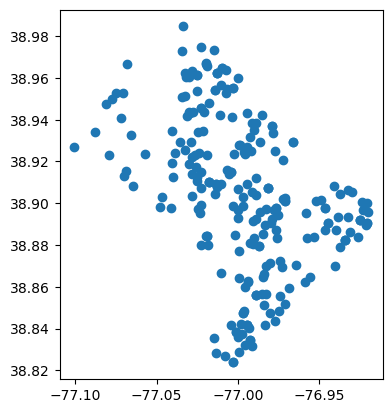

In [25]:
dc_schools.plot()

In [26]:
dc_schools.columns.values

array(['NCESSCH', 'LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE',
       'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA',
       'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD',
       'SLDL', 'SLDU', 'SCHOOLYEAR', 'geometry'], dtype=object)

In [69]:
dc_gdf

STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID        NAME  \
205      11   50000  02390665  1600000US1150000  1150000  Washington   

            NAMELSAD STUSPS            STATE_NAME LSAD      ALAND    AWATER  \
205  Washington city     DC  District of Columbia   25  158316184  18709787   

                                              geometry  
205  POLYGON ((-77.11976 38.93434, -77.11253 38.940...

In [72]:
# not sure what is going on here, ask robert

#dc_schools = dc_schools.merge(dc_gdf, left_on='STATE', right_on='STUSPS', how='inner').reset_index(drop=True)

In [29]:
dc_schools.columns.values

array(['NCESSCH', 'LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE',
       'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA',
       'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD',
       'SLDL', 'SLDU', 'SCHOOLYEAR', 'geometry'], dtype=object)

In [30]:
type(dc_schools)

geopandas.geodataframe.GeoDataFrame

<Axes: >

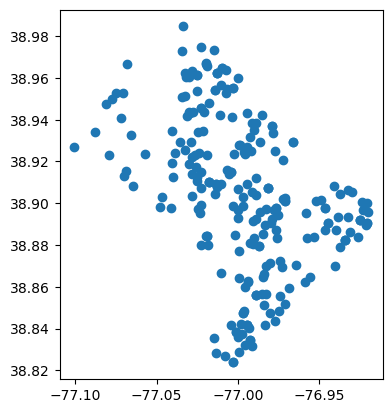

In [31]:
dc_schools.plot()

In [74]:
# ask robert

#joined_gdf = gpd.sjoin(dc_schools, dc_gdf, how="inner", predicate="intersects")
#joined_gdf

In [73]:

# joined_gdf.columns.values

<Axes: >

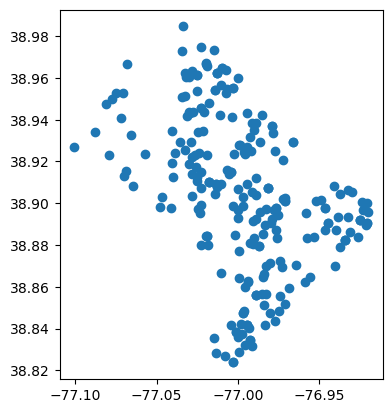

In [68]:
# joined_gdf.plot()

In [35]:
# joined_gdf

NCESSCH    LEAID  \
19330  110000500456  1100005   
19331  110000800338  1100008   
19332  110000800382  1100008   
19333  110000800478  1100008   
19334  110000800479  1100008   
...             ...      ...   
19569  110011400538  1100114   
19570  110011500539  1100115   
19571  110011600545  1100116   
19572  110011700546  1100117   
19573  110011800778  1100118   

                                               NAME_left OPSTFIPS  \
19330  Cesar Chavez Public Charter Schools for Public...       11   
19331                Friendship PCS - Collegiate Academy       11   
19332              Friendship PCS - Southeast Elementary       11   
19333                Friendship PCS - Blow Pierce Middle       11   
19334            Friendship PCS - Blow Pierce Elementary       11   
...                                                  ...      ...   
19569                                        I Dream PCS       11   
19570                                 Social Justice PCS       11   
19571                                Global Citizens PCS       11   
19572                                       LEARN DC PCS       11   
19573           DC Wildflower PCS - The Riverseed School       11   

                         STREET        CITY STATE    ZIP STFIP   CNTY  ...  \
19330      3701 HAYES STREET NE  Washington    DC  20019    11  11001  ...   
19331  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19332    645 MILWAUKEE PLACE SE  Washington    DC  20032    11  11001  ...   
19333        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
19334        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
...                         ...         ...   ...    ...   ...    ...  ...   
19569     2220 BRANCH AVENUE SE  Washington    DC  20020    11  11001  ...   
19570        5450 3RD STREET NE  Washington    DC  20011    11  11001  ...   
19571  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19572      100 DUNCAN STREET SW  Washington    DC  20032    11  11001  ...   
19573            913 55TH ST NE  WASHINGTON    DC  20019    11  11001  ...   

        PLACENS           GEOIDFQ    GEOID  NAME_right         NAMELSAD  \
19330  02390665  1600000US1150000  1150000  Washington  Washington city   
19331  02390665  1600000US1150000  1150000  Washington  Washington city   
19332  02390665  1600000US1150000  1150000  Washington  Washington city   
19333  02390665  1600000US1150000  1150000  Washington  Washington city   
19334  02390665  1600000US1150000  1150000  Washington  Washington city   
...         ...               ...      ...         ...              ...   
19569  02390665  1600000US1150000  1150000  Washington  Washington city   
19570  02390665  1600000US1150000  1150000  Washington  Washington city   
19571  02390665  1600000US1150000  1150000  Washington  Washington city   
19572  02390665  1600000US1150000  1150000  Washington  Washington city   
19573  02390665  1600000US1150000  1150000  Washington  Washington city   

      STUSPS            STATE_NAME LSAD      ALAND    AWATER  
19330     DC  District of Columbia   25  158316184  18709787  
19331     DC  District of Columbia   25  158316184  18709787  
19332     DC  District of Columbia   25  158316184  18709787  
19333     DC  District of Columbia   25  158316184  18709787  
19334     DC  District of Columbia   25  158316184  18709787  
...      ...                   ...  ...        ...       ...  
19569     DC  District of Columbia   25  158316184  18709787  
19570     DC  District of Columbia   25  158316184  18709787  
19571     DC  District of Columbia   25  158316184  18709787  
19572     DC  District of Columbia   25  158316184  18709787  
19573     DC  District of Columbia   25  158316184  18709787  

[243 rows x 39 columns]

## Hospitals

In [36]:
hospitals_path = "~/15min/hospitals/Hospitals.shp"

In [37]:
hospitals = gpd.read_file(hospitals_path, geometry='geometry')

In [38]:
hospitals.head()

OBJECTID          ID                          NAME  \
0         1  0001336420              ANDALUSIA HEALTH   
1         2  0001535611     ATHENS LIMESTONE HOSPITAL   
2         3  0000136502     ATMORE COMMUNITY HOSPITAL   
3         4  0000236124   BAPTIST MEDICAL CENTER EAST   
4         5  0001736111  BAPTIST MEDICAL CENTER SOUTH   

                                    ADDRESS        CITY STATE    ZIP  \
0  849 SOUTH THREE NOTCH STREET, PO BOX 760   ANDALUSIA    AL  36420   
1                    700 WEST MARKET STREET      ATHENS    AL  35611   
2                       401 MEDICAL PARK DR      ATMORE    AL  36502   
3            400 TAYLOR ROAD, PO BOX 241267  MONTGOMERY    AL  36117   
4   2105 EAST SOUTH BOULEVARD, PO BOX 11010  MONTGOMERY    AL  36111   

            ZIP4       TELEPHONE                TYPE  ...  \
0  NOT AVAILABLE  (334) 222-8466  GENERAL ACUTE CARE  ...   
1  NOT AVAILABLE  (256) 262-6468  GENERAL ACUTE CARE  ...   
2  NOT AVAILABLE  (251) 368-2500  GENERAL ACUTE CARE  ...   
3           1267  (334) 747-4410  GENERAL ACUTE CARE  ...   
4           0010  (334) 286-2100  GENERAL ACUTE CARE  ...   

                                             WEBSITE  STATE_ID       ALT_NAME  \
0           http://www.andalusiaregionalhospital.com     H2001  NOT AVAILABLE   
1             http://www.athenslimestonehospital.com     H4201  NOT AVAILABLE   
2  http://www.ebaptisthealthcare.org/atmorecommun...     H2704  NOT AVAILABLE   
3                        http://www.baptistfirst.org     H5107  NOT AVAILABLE   
4                        http://www.baptistfirst.org     H5102  NOT AVAILABLE   

  ST_FIPS                            OWNER  TTL_STAFF  BEDS         TRAUMA  \
0      01                      PROPRIETARY       -999    88      LEVEL III   
1      01                      PROPRIETARY       -999    71      LEVEL III   
2      01                       NON-PROFIT       -999    51      LEVEL III   
3      01  GOVERNMENT - DISTRICT/AUTHORITY       -999   150  NOT AVAILABLE   
4      01  GOVERNMENT - DISTRICT/AUTHORITY       -999   432       LEVEL II   

  HELIPAD                    geometry  
0       Y  POINT (-86.49455 31.29580)  
1       N  POINT (-86.97841 34.80416)  
2       Y  POINT (-87.47880 31.01702)  
3       Y  POINT (-86.17493 32.37640)  
4       Y  POINT (-86.27755 32.32815)  

[5 rows x 33 columns]

## SD Hospitals

In [39]:
sd_hospitals = hospitals[hospitals['CITY'].str.contains('SAN DIEGO', 'LA JOLLA')]

In [40]:
sd_hospitals

OBJECTID          ID                                               NAME  \
550        554  0036992123               RADY CHILDREN'S HOSPITAL - SAN DIEGO   
551        555  0042492123                            SHARP MEMORIAL HOSPITAL   
553        557  0020092120                  KAISER FOUNDATION HOSPITAL - ZION   
561        565  0002692128                                   AURORA SAN DIEGO   
562        566  0042392111                              SHARP MCDONALD CENTER   
565        569  0042292123   SHARP MARY BIRCH HOSPITAL FOR WOMEN AND NEWBORNS   
566        570  0001392120                   ALVARADO HOSPITAL MEDICAL CENTER   
569        573  0041292103                             SCRIPPS MERCY HOSPITAL   
572        576  0023292104                       KINDRED HOSPITAL - SAN DIEGO   
575        579  0051092103  UC SAN DIEGO HEALTH HILLCREST - HILLCREST MEDI...   
576        580  0038792110              SAN DIEGO COUNTY PSYCHIATRIC HOSPITAL   
578        582  0196784352                     SCRIPPS MERCY HOSPITAL D/P APH   
579        583  0070192120                   ALVARADO HOSPITAL MEDICAL CENTER   
580        584  0052092103              SELECT SPECIALTY HOSPITAL - SAN DIEGO   
772        776  0042592123                          SHARP MESA VISTA HOSPITAL   
783        787  0196784371                RADY CHILDREN'S HOSPITAL TRANSPLANT   
791        795  0196784375    UNIVERSITY OF CALIFORNIA SAN DIEGO - TRANSPLANT   
799        803  0196784376  RADY CHILDREN'S HOSPITAL - SAN DIEGO - PSYCHIA...   
815        819  0192092123             KAISER FOUNDATION HOSPITAL - SAN DIEGO   
1219      1298  0000000017                     NAVAL MEDICAL CENTER SAN DIEGO   
6496      6590  0003592161                        SAN DIEGO VA MEDICAL CENTER   
7582      7681  0035892105                      PROMISE HOSPITAL OF SAN DIEGO   

                          ADDRESS       CITY STATE    ZIP           ZIP4  \
550            3020 CHILDRENS WAY  SAN DIEGO    CA  92123           4223   
551                 7901 FROST ST  SAN DIEGO    CA  92123           2701   
553                 4647 ZION AVE  SAN DIEGO    CA  92120           2507   
561      11878 AVENUE OF INDUSTRY  SAN DIEGO    CA  92128           3423   
562           7989 LINDA VISTA RD  SAN DIEGO    CA  92111           5106   
565         3003 HEALTH CENTER DR  SAN DIEGO    CA  92123           2700   
566              6655 ALVARADO RD  SAN DIEGO    CA  92120           5208   
569                  4077 5TH AVE  SAN DIEGO    CA  92103           2105   
572            1940 EL CAJON BLVD  SAN DIEGO    CA  92104           1005   
575                200 W ARBOR DR  SAN DIEGO    CA  92103           1911   
576             3853 ROSECRANS ST  SAN DIEGO    CA  92110           3115   
578                  4077 5TH AVE  SAN DIEGO    CA  92103           2105   
579              6645 ALVARADO RD  SAN DIEGO    CA  92120           5208   
580             555 WASHINGTON ST  SAN DIEGO    CA  92103           2289   
772           7850 VISTA HILL AVE  SAN DIEGO    CA  92123           2717   
783            3020 CHILDRENS WAY  SAN DIEGO    CA  92123           4223   
791                200 W ARBOR DR  SAN DIEGO    CA  92103           1911   
799            3020 CHILDRENS WAY  SAN DIEGO    CA  92123           4223   
815     9455 CLAIREMONT MESA BLVD  SAN DIEGO    CA  92123  NOT AVAILABLE   
1219       34800 BOB WILSON DRIVE  SAN DIEGO    CA  92134  NOT AVAILABLE   
6496  3350 LA JOLLA VILLAGE DRIVE  SAN DIEGO    CA  92161           0002   
7582       5550 UNIVERSITY AVENUE  SAN DIEGO    CA  92105  NOT AVAILABLE   

           TELEPHONE                TYPE  ...  \
550   (858) 966-3001            CHILDREN  ...   
551   (858) 939-3400  GENERAL ACUTE CARE  ...   
553   (619) 528-6295  GENERAL ACUTE CARE  ...   
561   (858) 487-3200         PSYCHIATRIC  ...   
562   (858) 576-1200      REHABILITATION  ...   
565   (858) 939-3400  GENERAL ACUTE CARE  ...   
566   (619) 229-3172  GENERAL ACUTE CARE  ...   
5

In [41]:
sd_hospitals.explore()

## DC Hospitals

In [42]:
dc_hospitals = hospitals[hospitals['STATE'].str.contains('DC')]


In [43]:
dc_hospitals.explore()

## DC Bus Stops

In [44]:
dc_stops = gpd.read_file("~/15min/dc_bus_stops/Metro_Bus_Stops.shp", geometry='geometry')

<Axes: >

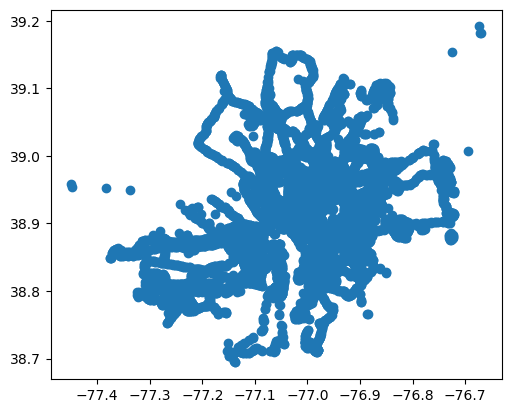

In [45]:
dc_stops.plot()

In [46]:
dc_stops.columns

Index(['EGIS_ID', 'REG_ID', 'BSTP_GEO_I', 'BSTP_OPS_T', 'BSTP_EFF_D',
       'BSTP_TCD', 'AT_STR', 'ON_STR', 'BSTP_HDG', 'BSTP_POS_T', 'BSTP_LDC',
       'BSTP_MSG_T', 'BSTP_LON', 'BSTP_LAT', 'BSTP_LAT_L', 'BSTP_INV_S',
       'BSTP_INV_1', 'BSTP_BNH_C', 'BSTP_BST_T', 'BSTP_IFC_O', 'BSTP_HAS_B',
       'BSTP_HAS_P', 'BSTP_HAS_1', 'BSTP_HAS_2', 'BSTP_PDP_S', 'BSTP_PDP_M',
       'BSTP_PDP_O', 'BSTP_PDP_H', 'BSTP_HAS_3', 'BSTP_BDR_P', 'BSTP_SWK_W',
       'BSTP_SWK_H', 'BSTP_SWK_1', 'BSTP_SWK_S', 'BSTP_SWK_O', 'BSTP_SWK_I',
       'ONS_CRP_SL', 'ONS_CRP', 'OFS_CRP', 'AT_STR_ABS', 'AT_STR_OSS',
       'ONS_CWK', 'OFS_CWK', 'AT_STR_A_1', 'AT_STR_O_1', 'ON_STR_STS',
       'ON_STR_PDC', 'AT_STR_PDC', 'BSTP_PRK_R', 'BSTP_NPK_Z', 'CNF_NPK_SN',
       'STR_LGT_WT', 'BSTP_HAS_L', 'BSTP_ACC_R', 'BSTP_BRDG_', 'BSTP_HAS_4',
       'BSTP_HAS_5', 'METRO_ACCS', 'WARD_ID', 'ANC_ID', 'SMD_ID', 'ROUTEID',
       'MEASURE', 'OFFSET', 'BLOCKKEY', 'BLOCKFACEK', 'GIS_ID', 'SE_ANNO_CA',
       'GLOBALID', 'C

## SD Bus Stops

In [47]:

sd_stops = gpd.read_file("~/15min/sd_stops/transit_stops_datasd.shp", geometry='geometry')

In [48]:
sd_stops = sd_stops[sd_stops['stop_agncy']=='MTS']

In [49]:
sd_stops.explore()   #sd county, how to limit to City only

## DC Parks

In [50]:

dc_parks = gpd.read_file("~/15min/dc_parks/Parks_and_Recreation_Areas.shp", geometry='geometry')

<Axes: >

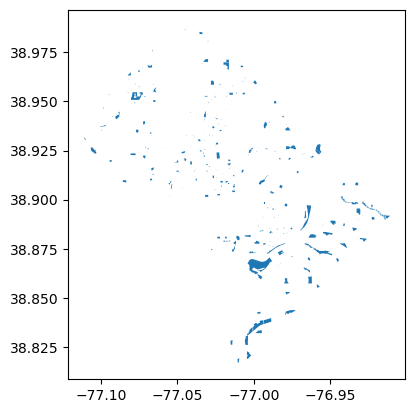

In [51]:
dc_parks.plot()

## SD Parks

In [52]:
sd_parks = gpd.read_file("~/15min/sd_parks/parks_datasd.shp", geometry='geometry')

<Axes: >

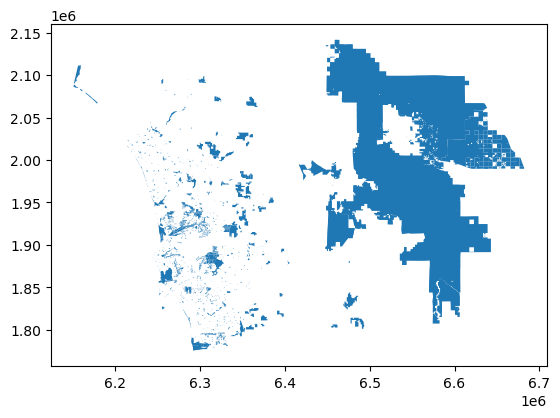

In [53]:
sd_parks.plot()

## DC Places of Worship

In [54]:

dc_worship = gpd.read_file("~/15min/dc_worship/Places_of_Worship.shp", geometry='geometry')

<Axes: >

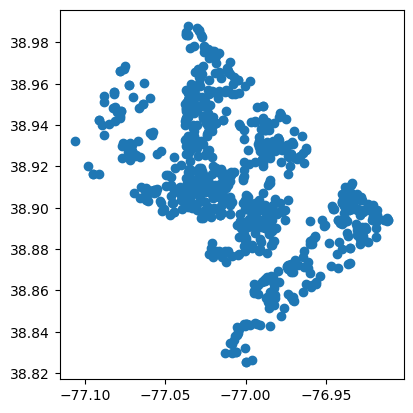

In [55]:
dc_worship.plot()

## DC Grocery 

In [75]:
dc_grocery = gpd.read_file("~/15min/dc_grocery/Grocery_Store_Locations.shp", geometry='geometry')

<Axes: >

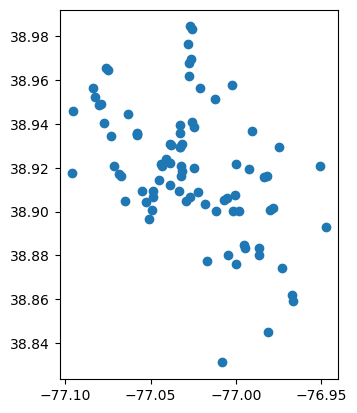

In [57]:
dc_grocery.plot()

In [58]:
dc_grocery.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## SD Places of Worship

In [79]:
sd_worship = gpd.read_file("~/15min/sd_worship/PLACES.shp", geometry='geometry')
sd_worship.head()

NAME                  ADDR     CITYNM  \
0  COUNTY OF SAN DIEGO-SOCIAL SERVICES      3355 MISSION AVE  Oceanside   
1  CITY OF OCEANSIDE OPERATIONS CENTER  4925 OCEANSIDE BLVD.  Oceanside   
2                     Park 1200 I & II   1122-4Melrose Dr N.      Vista   
3      Oceanside Airport Business Park     572-62 Airport Rd  Oceanside   
4                            Hobie Cat  4925  Oceanside Blvd  Oceanside   

                  TYPE DESCRIP                     FEA_SRC  \
0   GovernmentFacility    None  PLACES_OLD_FeatureToPoint2   
1   GovernmentFacility    None  PLACES_OLD_FeatureToPoint2   
2  IndustrialStructure    None  PLACES_OLD_FeatureToPoint2   
3       BusinessCenter    None  PLACES_OLD_FeatureToPoint2   
4       BusinessCenter    None     PLACES_OLD_; GOOGLEMAPS   

             COMMUNITYN  SCALE  EDIT_REASO CREATOR CREATED   EDITOR  \
0             Oceanside  24000           1    None    None  LWEDLEY   
1             Oceanside  24000           1    None    None  LWEDLEY   
2                 Vista  24000           1    None    None  LWEDLEY   
3             Oceanside  24000           1    None    None  LWEDLEY   
4  Ivey Ran/Ran Del Oro  24000           1    None    None  LWEDLEY   

       EDITED  Primary_Di  Zipcode   Longitude   Latitude  \
0  2022-04-11           1    92054 -117.341449  33.217268   
1  2022-04-11           1    92056 -117.266665  33.217821   
2  2022-04-11           1    92083 -117.256516  33.217679   
3  2022-04-11           1    92058 -117.352739  33.216756   
4  2022-04-11           1    92056 -117.269119  33.217236   

                          geometry  
0  POINT (6227870.500 2024425.630)  
1  POINT (6250743.000 2024395.630)  
2  POINT (6253846.500 2024313.880)  
3  POINT (6224416.000 2024275.750)  
4  POINT (6249990.500 2024190.000)

In [80]:
sd_worship = sd_worship[sd_worship['TYPE'].str.contains('Religious')]

In [81]:
sd_worship = sd_worship[sd_worship['CITYNM']=='San Diego']

In [82]:
sd_worship.explore()

In [83]:
sd_stops.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [92]:
sd.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Overlay sd boundary with sd_stops to filter out points outside boundary

In [84]:
#match crs to EPSG 2230
sd = sd.to_crs(sd_stops.crs)

<Axes: >

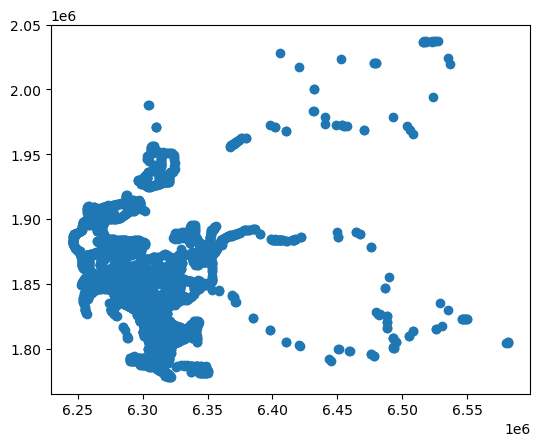

In [87]:
sd_stops.plot()

In [88]:
sd_b = gpd.read_file("~/15min/sd_boundary/san_diego_boundary_datasd.shp", geometry='geometry')
sd_b.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [93]:
sd_stops = gpd.overlay(sd_stops, sd, how='intersection', keep_geom_type=None, make_valid=True)

<Axes: >

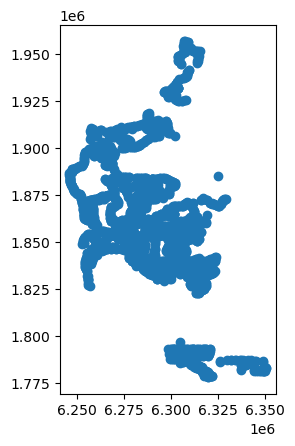

In [94]:
sd_stops.plot()